In [1]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf

data = read_data()

K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Nb of alternatives

W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
Q = [4, 0.3, 40,  0.4, 4, 2] # Indifference thresholds
P = [28, 0.9, 80, 1, 20, 12] # Preference thresholds

utils.py Loading
Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


In [2]:
phi_c_all = pf.get_all_Phi_c(data, P, Q) # compute all mono criterion flows series
PHI = pf.PHI_all(phi_c_all, W, N, L, K) # Aggregate to the net flow series

c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


In [6]:
# Transform PHI into a dataframe with ISO3 as index and years as columns
PHI_df = pd.DataFrame(PHI, index=data.index, columns=np.arange(1990, 2023))

In [13]:
def plot_PHI(PHI, alt_names, labels=True):
    """
    Plot the net flow series for all alternatives
    """
    fig, ax = plt.subplots()
    # size
    fig.set_size_inches(10, 5)
    for i in range(PHI.shape[0]):
        ax.plot(PHI.iloc[i], label=alt_names[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Net flow")
    ax.set_title("PHI scores for all alternatives")
    if labels:
        ax.legend()
    plt.show()

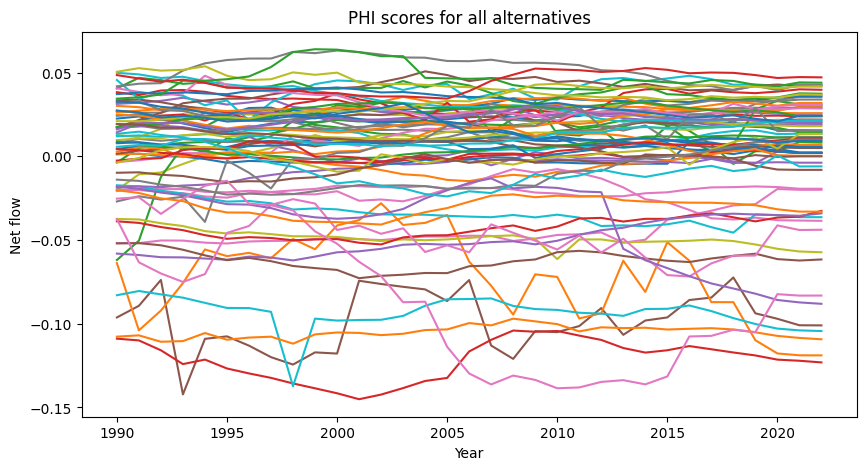

In [16]:
plot_PHI(PHI_df, PHI_df.index, False)